In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xml.dom.minidom import parse, parseString

# SFRA Test

In [2]:
DIR_PATH = "data/pltu_priok_bbt/"
DATA = "bc00713c-c3ba-4d93-b514-aa2400ebfb57.xml"

In [3]:
dom = parse(DIR_PATH + DATA)
dom

In [4]:
import re

def parse_string(string):
    string = re.sub('\d', '', string)
    string = string.replace(": ", "")
    string = string.replace(" ", "_")
    return string

In [5]:
# ambil seluruh nama data
fra_measurements = dom.getElementsByTagName("FRAMeasurement")

df = pd.DataFrame()
for i in range(len(fra_measurements)):
    measurement = parse_string(fra_measurements[i].getElementsByTagName("Name")[0].firstChild.nodeValue)
    data_measure = fra_measurements[i].getElementsByTagName("FRASweepPoint")
    
    freq_l, mag_l, phase_l = [], [], []
    for data in data_measure:
        freq = data.getElementsByTagName("Frequency")[0].firstChild.nodeValue
        mag = data.getElementsByTagName("Magnitude")[0].firstChild.nodeValue
        phase = data.getElementsByTagName("Phase")[0].firstChild.nodeValue
        
        freq_l.append(freq)
        mag_l.append(mag)
        phase_l.append(phase)
        
    df[str(measurement) + "_freq"] = pd.to_numeric(freq_l)
    df[str(measurement) + "_mag"] = pd.to_numeric(mag_l)
    df[str(measurement) + "_phase"] = pd.to_numeric(phase_l)

In [6]:
df.head()

,Zero_Check_freq,Zero_Check_mag,Zero_Check_phase,A_B_freq,A_B_mag,A_B_phase,B_C_freq,B_C_mag,B_C_phase,C_A_freq,...,C_A_phase,a_n_freq,a_n_mag,a_n_phase,b_n_freq,b_n_mag,b_n_phase,c_n_freq,c_n_mag,c_n_phase
0,20.0,-0.011745,0.000293,20.0,-33.802200,-75.425383,20.0,-31.770979,-73.972279,20.0,...,-73.952168,20.0,-13.701628,-51.889408,20.0,-15.631099,-56.082828,20.0,-13.342473,-50.557823
1,21.6,-0.011762,0.000407,21.6,-34.346681,-75.704241,21.6,-32.203406,-74.537446,21.6,...,-74.444399,21.6,-14.196913,-52.840415,21.6,-16.134897,-56.868282,21.6,-13.812732,-51.559476
2,23.2,-0.011787,0.000170,23.2,-34.855572,-75.558062,23.2,-32.636891,-74.568897,23.2,...,-74.439831,23.2,-14.607562,-53.465128,23.2,-16.542630,-57.357232,23.2,-14.203056,-52.245417
3,24.8,-0.011733,0.000214,24.8,-35.302681,-75.409960,24.8,-32.997178,-74.579724,24.8,...,-74.397778,24.8,-14.968913,-53.947174,24.8,-16.894948,-57.724916,24.8,-14.546320,-52.788333
4,26.4,-0.011768,0.000165,26.4,-35.697224,-75.315957,26.4,-33.303554,-74.652970,26.4,...,-74.414796,26.4,-15.294091,-54.338347,26.4,-17.207893,-58.022086,26.4,-14.854970,-53.237163


In [7]:
df.describe()

,Zero_Check_freq,Zero_Check_mag,Zero_Check_phase,A_B_freq,A_B_mag,A_B_phase,B_C_freq,B_C_mag,B_C_phase,C_A_freq,...,C_A_phase,a_n_freq,a_n_mag,a_n_phase,b_n_freq,b_n_mag,b_n_phase,c_n_freq,c_n_mag,c_n_phase
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,...,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2.494509e+05,-0.020032,-0.031146,2.494509e+05,-32.862408,9.378381,2.494509e+05,-32.212404,7.361978,2.494509e+05,...,7.497706,2.494509e+05,-18.811676,-11.944982,2.494509e+05,-19.450874,-10.856131,2.494509e+05,-18.859848,-12.445021
std,4.706190e+05,0.009958,0.084561,4.706190e+05,17.291747,71.143274,4.706190e+05,16.453396,69.363842,4.706190e+05,...,69.535177,4.706190e+05,9.567541,66.352531,4.706190e+05,10.257424,68.536203,4.706190e+05,9.651453,65.867285
min,2.000000e+01,-0.039518,-0.294326,2.000000e+01,-71.266910,-117.129418,2.000000e+01,-65.867556,-100.589713,2.000000e+01,...,-116.638217,2.000000e+01,-48.409661,-173.721336,2.000000e+01,-48.779309,-179.756252,2.000000e+01,-49.384242,-166.824803
25%,8.937078e+02,-0.030735,-0.026591,8.937078e+02,-46.822345,-74.330054,8.937078e+02,-45.445121,-71.371217,8.937078e+02,...,-73.812358,8.937078e+02,-25.900055,-60.829227,8.937078e+02,-26.529645,-65.619882,8.937078e+02,-25.597712,-63.513028
50%,1.381919e+04,-0.011794,-0.000228,1.381919e+04,-31.804685,39.364828,1.381919e+04,-32.027759,34.702289,1.381919e+04,...,34.474860,1.381919e+04,-17.384292,-38.147325,1.381919e+04,-17.996051,-38.168350,1.381919e+04,-17.474146,-39.843268
75%,2.136814e+05,-0.011681,0.000293,2.136814e+05,-16.376645,81.572754,2.136814e+05,-16.168071,79.202790,2.136814e+05,...,79.215963,2.136814e+05,-10.821972,48.229594,2.136814e+05,-10.842773,56.533761,2.136814e+05,-11.013073,49.931386
max,2.000000e+06,-0.011199,0.121789,2.000000e+06,-4.554601,86.747284,2.000000e+06,-4.189259,86.161960,2.000000e+06,...,86.153770,2.000000e+06,-1.313905,178.284449,2.000000e+06,-0.901287,172.116113,2.000000e+06,-0.616061,171.438380


## Plotting

In [8]:
df.columns

Index(['Zero_Check_freq', 'Zero_Check_mag', 'Zero_Check_phase', 'A_B_freq',
       'A_B_mag', 'A_B_phase', 'B_C_freq', 'B_C_mag', 'B_C_phase', 'C_A_freq',
       'C_A_mag', 'C_A_phase', 'a_n_freq', 'a_n_mag', 'a_n_phase', 'b_n_freq',
       'b_n_mag', 'b_n_phase', 'c_n_freq', 'c_n_mag', 'c_n_phase'],
      dtype='object')

In [9]:
df_sfra = df[df.columns[3:9]]
df_sfra['deviasi'] = df_sfra['A_B_mag'] - df_sfra['B_C_mag']
df_sfra['A_B_freq_log'] = np.log(df_sfra['A_B_mag'])
df_sfra['B_C_freq_log'] = np.log(df_sfra['B_C_mag'])
df_sfra.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: in

,A_B_freq,A_B_mag,A_B_phase,B_C_freq,B_C_mag,B_C_phase,deviasi,A_B_freq_log,B_C_freq_log
0,20.0,-33.802200,-75.425383,20.0,-31.770979,-73.972279,-2.031221,NaN,NaN
1,21.6,-34.346681,-75.704241,21.6,-32.203406,-74.537446,-2.143274,NaN,NaN
2,23.2,-34.855572,-75.558062,23.2,-32.636891,-74.568897,-2.218682,NaN,NaN
3,24.8,-35.302681,-75.409960,24.8,-32.997178,-74.579724,-2.305503,NaN,NaN
4,26.4,-35.697224,-75.315957,26.4,-33.303554,-74.652970,-2.393669,NaN,NaN


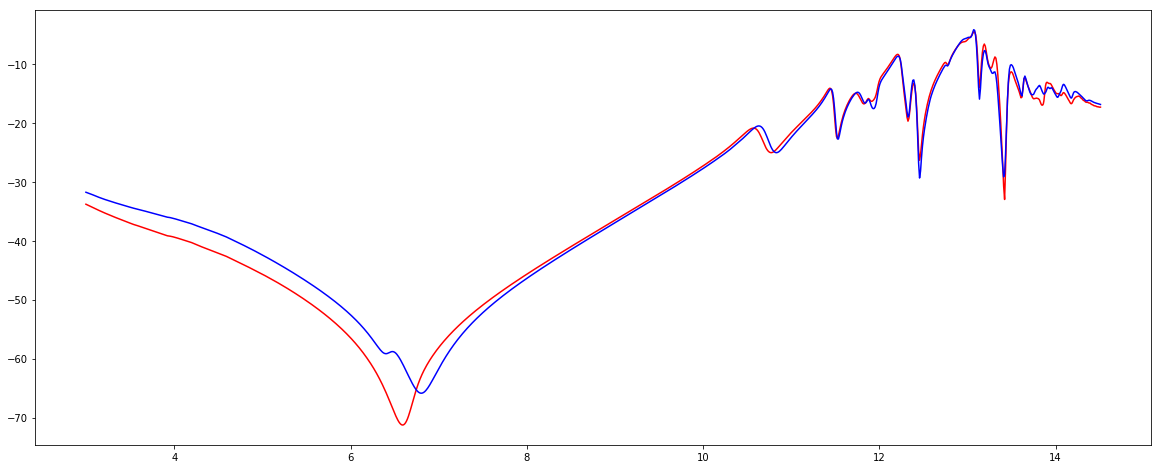

In [10]:
plt.figure(figsize=(20,8))
plt.plot(np.log(df["A_B_freq"]), df["A_B_mag"], color='red')
plt.plot(np.log(df["B_C_freq"]), df["B_C_mag"], color='blue')

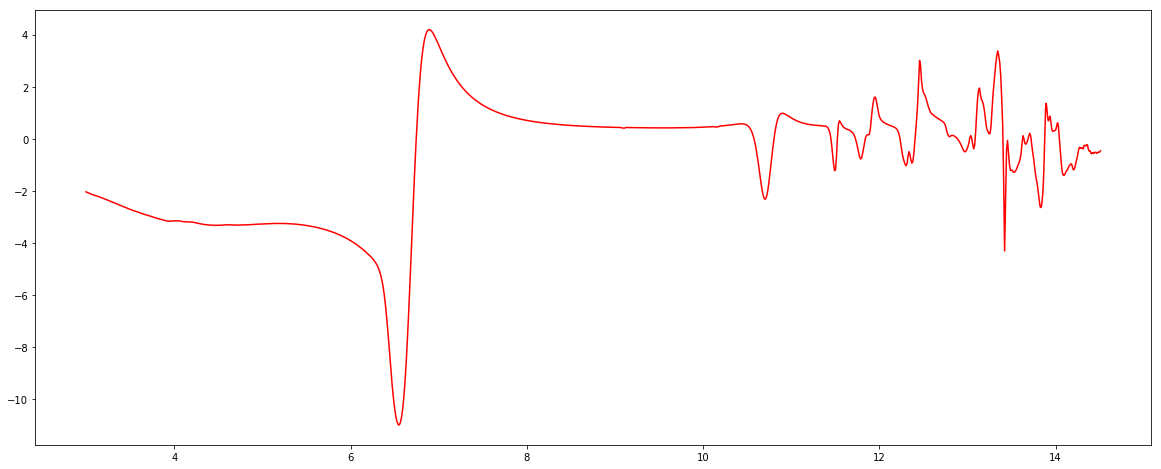

In [11]:
plt.figure(figsize=(20,8))
plt.plot(np.log(df["A_B_freq"]), df["A_B_mag"]-df["B_C_mag"], color='red')
# plt.plot(np.log(df["B_C_freq"]), df["B_C_phase"], color='blue')

In [12]:
np.log(1000)

6.907755278982137

# Winding Resistance (LV Winding)

In [13]:
DIR_PATH = "data/pltu_priok_bbt/"
DATA = "30749e27-460f-479f-8356-aa2a01043583.xml"

In [14]:
dom_wr_lv = parse(DIR_PATH + DATA)
dom_wr_lv

In [15]:
# ambil seluruh nama data
wr_sec_measurements = dom_wr_lv.getElementsByTagName("TransformerWindingResistanceMeasurement")

df_wr_lv = pd.DataFrame()
r_value_l, r_dev_l = [], []
s_value_l, s_dev_l = [], []
t_value_l, t_dev_l = [], []

for i in range(len(wr_sec_measurements)):
    phasa_r = wr_sec_measurements[i].getElementsByTagName("PhaseAResult")
    phasa_s = wr_sec_measurements[i].getElementsByTagName("PhaseBResult")
    phasa_t = wr_sec_measurements[i].getElementsByTagName("PhaseCResult")
     
    # phasa r
    r_value = phasa_r[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    r_dev = phasa_r[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue
    
    # phasa s
    s_value = phasa_s[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    s_dev = phasa_s[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue

    # phasa t
    t_value = phasa_t[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    t_dev = phasa_t[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue

    r_value_l.append(r_value)
    r_dev_l.append(r_dev)
    s_value_l.append(s_value)
    s_dev_l.append(s_dev)
    t_value_l.append(t_value)
    t_dev_l.append(t_dev)

        
df_wr_lv["phasa_r"] = r_value_l
df_wr_lv["dev_r"] = r_dev_l
df_wr_lv["phasa_s"] = s_value_l
df_wr_lv["dev_s"] = s_dev_l
df_wr_lv["phasa_t"] = t_value_l
df_wr_lv["dev_t"] = t_dev_l

# drop NaN
df_wr_lv = df_wr_lv.apply (pd.to_numeric, errors='coerce')
df_wr_lv.dropna()

,phasa_r,dev_r,phasa_s,dev_s,phasa_t,dev_t
0,0.005148,0.069244,0.007751,0.094921,0.00515,0.067963


In [16]:
df_wr_lv.dtypes

phasa_r    float64
dev_r      float64
phasa_s    float64
dev_s      float64
phasa_t    float64
dev_t      float64
dtype: object

# Winding Resistance HV Winding

In [17]:
DIR_PATH = "data/pltu_priok_bbt/"
DATA = "b2510b5f-1243-445d-a39e-aa2a00e47eee.xml"

In [18]:
# ambil seluruh nama data
dom_wr_hv = parse(DIR_PATH + DATA)
wr_prim_measurements = dom_wr_hv.getElementsByTagName("TransformerWindingResistanceMeasurement")

df_wr_hv = pd.DataFrame()
tap_name_l, direction_l = [], []
r_value_l, r_dev_l = [], []
s_value_l, s_dev_l = [], []
t_value_l, t_dev_l = [], []

for i in range(len(wr_prim_measurements)):
    tap_name = wr_prim_measurements[i].getElementsByTagName("TapName")[0].firstChild.nodeValue
    direction = wr_prim_measurements[i].getElementsByTagName("Direction")[0].firstChild.nodeValue
    phasa_r = wr_prim_measurements[i].getElementsByTagName("PhaseAResult")
    phasa_s = wr_prim_measurements[i].getElementsByTagName("PhaseBResult")
    phasa_t = wr_prim_measurements[i].getElementsByTagName("PhaseCResult")
    
    # phasa r
    r_value = phasa_r[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    r_dev = phasa_r[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue
    
    # phasa s
    s_value = phasa_s[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    s_dev = phasa_s[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue

    # phasa t
    t_value = phasa_t[0].getElementsByTagName("ResistanceMeasured")[0].firstChild.nodeValue
    t_dev = phasa_t[0].getElementsByTagName("Deviation")[0].firstChild.nodeValue
    
    tap_name_l.append(tap_name)
    direction_l.append(direction)
    r_value_l.append(r_value)
    r_dev_l.append(r_dev)
    s_value_l.append(s_value)
    s_dev_l.append(s_dev)
    t_value_l.append(t_value)
    t_dev_l.append(t_dev)

df_wr_hv["tap_name"] = tap_name_l
df_wr_hv["direction"] = direction_l
df_wr_hv["phasa_r"] = r_value_l
df_wr_hv["dev_r"] = r_dev_l
df_wr_hv["phasa_s"] = s_value_l
df_wr_hv["dev_s"] = s_dev_l
df_wr_hv["phasa_t"] = t_value_l
df_wr_hv["dev_t"] = t_dev_l

In [19]:
df_wr_hv

,tap_name,direction,phasa_r,dev_r,phasa_s,dev_s,phasa_t,dev_t
0,1,None,0.086655,0.077954913020605865,0.0866545551518384,0.096698070768641564,0.085855942937137525,0.087977066871069987
1,2,Up,0.085435,0.07860875899119435,0.085497849928330941,0.070228828934282284,0.084661666666666677,0.082682048152427079
2,3,Up,0.0842311410380346,0.0910494438066678,0.084280523982533911,0.093740617273785354,0.083488333333333331,0.0878383773856184
3,4,Up,0.08297,0.088385360170351035,0.083075564147861741,0.090312481184895432,0.082173927535748814,0.079713553732108089
4,5,Up,0.081798333333333348,0.079462102689475955,0.081896666666666673,0.077334798624262291,0.080946666666666681,0.066682582618682318
5,6,Up,0.080662688756291887,0.075212148772862975,0.080715642811906269,0.081798090754570119,0.07987000000000001,0.0722103536168417
6,7,Up,0.079596666666666677,0.091778991713775682,0.079645368796453689,0.071551004468739521,0.078893333333333343,0.079107634851860453
7,8,Up,0.078797626587552919,0.087617063778777649,0.078504049865004491,0.078604661043946145,0.077746666666666672,0.09417632249020258
8,9,Up,0.076793333333333338,0.072625700797379622,0.076668333333333338,0.095654253353338881,0.07609,0.072290740213376559
9,10,Up,0.0785878587858786,0.094228306151089569,0.078561666666666669,0.095466406432320738,0.077795,0.066430943962281219
